In [10]:
import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import climate_indices.indices as indices
from sklearn.metrics import classification_report

In [29]:
np.isnan(evaluator.predicted_y).sum()

0

In [61]:
class Evaluator:
    def __init__(self, result):
        self.result = result
        (
            self.true_y,
            self.predicted_y,
            self.latitued,
            self.start_year,
            self.calibration_year_initial,
            self.calibration_year_final,
        ) = self.result

    def calculate_pet(self):
        average_true_temp = self.true_y[:, 1:3].mean(axis=1)
        average_predicted_temp = self.predicted_y[:, 1:3].mean(axis=1)

        true_pet = indices.pet(average_true_temp, self.latitued, self.start_year)
        predicted_pet = indices.pet(average_predicted_temp, self.latitued, self.start_year)
        
        return true_pet, predicted_pet

    def calculate_spei(self, **params):
        true_pet, predicted_pet = self.calculate_pet()
        
        true_spei = indices.spei(self.true_y[:, 0], true_pet, **params)
        predicted_spei = indices.spei(self.predicted_y[:, 0], predicted_pet, **params)
        return true_spei, predicted_spei

    def interpret_spei(self, spei_values):
        def get_label(spei_value):
            if spei_value > 2:
                return "Extremely wet"
            elif 1.5 <= spei_value <= 2:
                return "Very wet"
            elif 1 <= spei_value < 1.5:
                return "Moderately wet"
            elif -1 <= spei_value < 1:
                return "Normal"
            elif -1.5 <= spei_value < -1:
                return "Moderately dry"
            elif -2 <= spei_value < -1.5:
                return "Severely dry"
            else:
                return "Extremely dry"
        return np.array([get_label(spei) for spei in spei_values])
    
    def evaluate(self, scale):
        true_spei, predicted_spei = self.calculate_spei(
            scale=scale,
            distribution=indices.Distribution.gamma,
            periodicity=indices.compute.Periodicity.monthly,
            data_start_year=self.start_year,
            calibration_year_initial=self.calibration_year_initial,
            calibration_year_final=self.calibration_year_final
        )
        self.true_spei = true_spei
        self.predicted_spei = predicted_spei
        true_spei_label = self.interpret_spei(true_spei)
        predicted_spei_label = self.interpret_spei(predicted_spei)
        

        return true_spei_label, predicted_spei_label

2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all neg

(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)


2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all negatives clipped to zero
2024-06-21  09:04:06 WARNING Input contains negative values -- all neg

(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
(360, 3)
###################### Final Report ############################
                precision    recall  f1-score   support

 Extremely dry       0.88      0.86      0.87      1868
 Extremely wet       0.07      0.02      0.03       463
Moderately dry       0.28      0.29      0.29      2865
Moderately wet       0.24      0.32      0.27      2515
        Normal       0.73      0.68      0.70     15048
  Severely dry       0.20      0.28      0.23       996
      Very wet       0.17      0.15      0.16      1085

      accuracy                           0.56     24840
     macro avg       0.36      0.37      0.36     24840
  weighted avg       0.58      0.56      0.57     24840



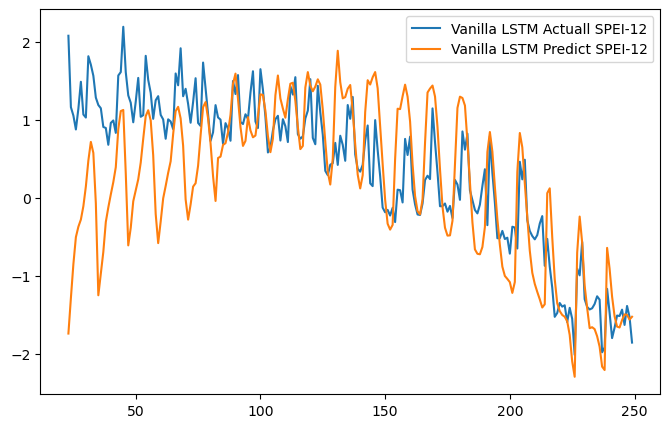

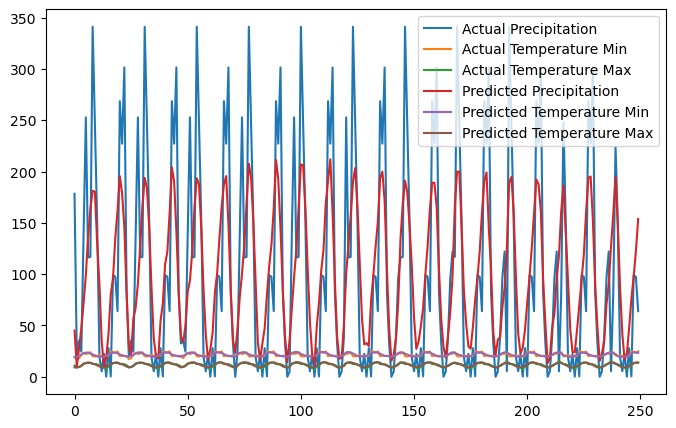

In [95]:
scale = 24

pickles = glob.glob(f'results/{scale}/vanilla_lstm_spei24_inp48_testset15.pkl')

for pkl in pickles:
    results = pickle.load(open(pkl, 'rb'))
    true_yi, pred_yi = [], []
    true_spei, pred_spei = [], []
    true_y, pred_y = [], []
    for i, result in enumerate(results):
        evaluator = Evaluator(result)
        true_spei_label, predicted_spei_label = evaluator.evaluate(scale=scale)
        true_spei.extend(evaluator.true_spei)
        pred_spei.extend(evaluator.predicted_spei)
        true_yi.extend(evaluator.true_y)
        pred_yi.extend(evaluator.predicted_y)
        true_y.extend(true_spei_label)
        pred_y.extend(predicted_spei_label)
        #print(f'###################### Report for {i} ############################')
        #print(classification_report(true_spei_label, predicted_spei_label))
    
    print('###################### Final Report ############################')
    print(classification_report(true_y, pred_y))
    
    long_truei = np.array(true_yi[:250])
    long_predi = np.array(pred_yi[:250])
    
    long_true_spei = np.array(true_spei[:250])
    long_pred_spei = np.array(pred_spei[:250])
    
    plt.figure(figsize=(8, 5))
    plt.plot(long_true_spei, label=f"Vanilla LSTM Actuall SPEI-24")
    plt.plot(
        long_pred_spei,
        label=f"Vanilla LSTM Predict SPEI-24",
    )
    plt.legend(loc="best")
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.plot(long_truei, label=["Actual Precipitation", "Actual Temperature Min", "Actual Temperature Max"])
    plt.plot(
        long_predi,
        label=["Predicted Precipitation", "Predicted Temperature Min", "Predicted Temperature Max"],
    )
    plt.legend(loc="best")
    plt.show()

                precision    recall  f1-score   support

 Extremely dry       1.00      1.00      1.00       759
Moderately dry       0.77      0.70      0.73       657
Moderately wet       0.71      0.68      0.70       674
        Normal       0.84      0.86      0.85      1846
  Severely dry       0.42      0.65      0.51       153
      Very wet       0.21      0.10      0.13        51

      accuracy                           0.81      4140
     macro avg       0.66      0.66      0.65      4140
  weighted avg       0.82      0.81      0.81      4140

